* **ABIR JAMALY** -- **CIP: jama1802**
*  **HAMZA BOUSSAIRI**  -- **CIP: bouh2028**
*  **Mallory Vadim Couthon** -- **CIP: coum2050**
* **JINANE BOUFARIS** -- **CIP: bouj1113**





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn import preprocessing


import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv("weatherAUS.csv")
data.tail() 

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[5 rows x 23 columns]

In [3]:
data.shape

(145460, 23)

In [4]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
data.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

In [6]:
data.describe(include=['object'])

Date  Location WindGustDir WindDir9am WindDir3pm RainToday  \
count       145460    145460      135134     134894     141232    142199   
unique        3436        49          16         16         16         2   
top     2013-11-12  Canberra           W          N         SE        No   
freq            49      3436        9915      11758      10838    110319   

       RainTomorrow  
count        142193  
unique            2  
top              No  
freq         110316

In [7]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [8]:
data.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

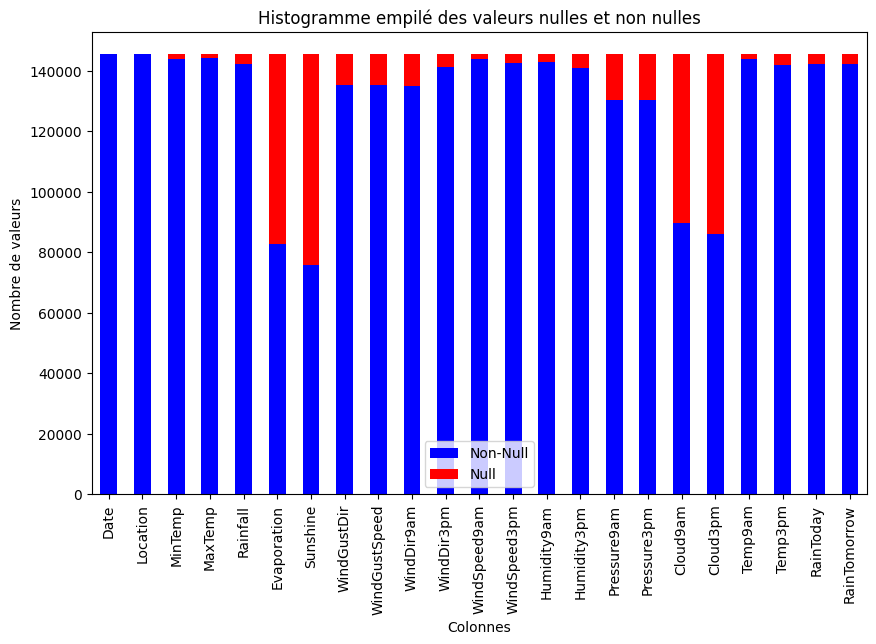

In [9]:
# Afficher le graphe des donnees manquantes
null_counts = data.isna().sum()
non_null_counts = len(data) - null_counts
df_counts = pd.DataFrame([non_null_counts, null_counts], index=[ 'Non-Null' ,'Null'])
df_counts_transposed = df_counts.transpose()

ax = df_counts_transposed.plot.bar(stacked=True, figsize=(10, 6),color=["blue","red"])
ax.set_title('Histogramme empilé des valeurs nulles et non nulles')
ax.set_xlabel('Colonnes')
ax.set_ylabel('Nombre de valeurs')

plt.show()

## Exploring the Target

In [10]:
data["RainTomorrow"].isna().sum()

3267

In [13]:
data["RainTomorrow"].unique()

array(['No', 'Yes', nan], dtype=object)

In [16]:
df = data.copy()

**Nous copions le contenu de `data` dans `df`. Cette étape est réalisée afin de préserver les données originales dans `df` et d'éviter que les modifications telles que le codage des étiquettes appliquées à `data` ne les affectent également dans `df`. Cette approche garantit une liberté totale pour les visualisations ultérieures, en permettant de travailler sur les données brutes stockées dans `df`.**

In [11]:
data.dropna(subset=["RainTomorrow"], inplace=True)
data.tail()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
145454  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
145454       NaN           E           31.0        ESE  ...        59.0   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
145454         27.0       1024.7       1021.2       NaN       NaN      9.4   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   

        Temp3pm  RainToday  RainTomorrow  
145454     20.9         No            No  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  

[5 rows x 23 columns]

In [12]:
data['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [14]:
data['RainTomorrow'].value_counts()/len(data)

No     0.775819
Yes    0.224181
Name: RainTomorrow, dtype: float64

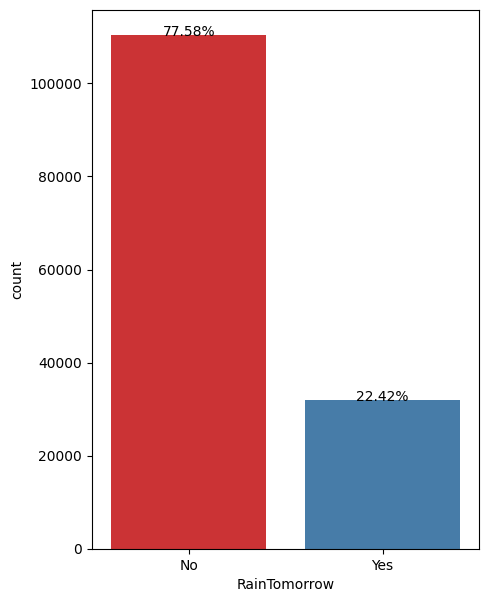

In [17]:
f, ax = plt.subplots(figsize=(5, 7))
ax = sns.countplot(x="RainTomorrow", data=data, palette="Set1")

total = len(data)

# Ajouter le pourcentage au-dessus de chaque barre
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
            '{:.2f}%'.format(height / total * 100),
            ha="center")

plt.show()

## Exploring categorical columns

In [18]:
the_columns = [column for column in data.columns if data[column].dtype=='O']

print("le nombre de colonnes categoriques est : ", len(the_columns))
print("les colonnes categoriques sont : ", the_columns)

le nombre de colonnes categoriques est :  7
les colonnes categoriques sont :  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [19]:
df[the_columns].isna().sum()

Date                0
Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

### Date

In [20]:
data['Date'].dtype

dtype('O')

In [21]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date'].dtype

dtype('<M8[ns]')

In [22]:
data['Year'] = data['Date'].dt.year
data['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [23]:
data['Month'] = data['Date'].dt.month
data['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [24]:
data['Day'] = data['Date'].dt.day
data['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64

In [25]:
data.set_index('Date', inplace=True)
data.tail()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
Date                                                                     
2017-06-20    Uluru      3.5     21.8       0.0          NaN       NaN   
2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   

           WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  \
Date                                                         ...                
2017-06-20           E           31.0        ESE          E  ...       1021.2   
2017-06-21           E           31.0         SE        ENE  ...       1020.3   
2017-06-22         NNW           22.0         SE          N  ...       1019.1   
2017-06-23           N           37.0         SE        WNW  ...       1016.8   
2017-06-24          SE           28.0        SSE          N  ...       1016.5   

            Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
Date                                                                        
2017-06-20       NaN       NaN      9.4     20.9         No            No   
2017-06-21       NaN       NaN     10.1     22.4         No            No   
2017-06-22       NaN       NaN     10.9     24.5         No            No   
2017-06-23       NaN       NaN     12.5     26.1         No            No   
2017-06-24       3.0       2.0     15.1     26.0         No            No   

            Year  Month  Day  
Date                          
2017-06-20  2017      6   20  
2017-06-21  2017      6   21  
2017-06-22  2017      6   22  
2017-06-23  2017      6   23  
2017-06-24  2017      6   24  

[5 rows x 25 columns]

### Location

In [26]:
print("le nombre de province est : ", len(data["Location"].unique()))
data["Location"].unique()

le nombre de province est :  49


array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [27]:
data["Location"].value_counts()

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


In [30]:
f, ax = plt.subplots(figsize=(140, 60))
ax = sns.countplot(x="Location", data=data, palette="Set1")
plt.show()

In [28]:
province_encoder = preprocessing.LabelEncoder()
data['Location'] = province_encoder.fit_transform(data['Location'])
data

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
Date                                                                      
2008-12-01         2     13.4     22.9       0.6          NaN       NaN   
2008-12-02         2      7.4     25.1       0.0          NaN       NaN   
2008-12-03         2     12.9     25.7       0.0          NaN       NaN   
2008-12-04         2      9.2     28.0       0.0          NaN       NaN   
2008-12-05         2     17.5     32.3       1.0          NaN       NaN   
...              ...      ...      ...       ...          ...       ...   
2017-06-20        41      3.5     21.8       0.0          NaN       NaN   
2017-06-21        41      2.8     23.4       0.0          NaN       NaN   
2017-06-22        41      3.6     25.3       0.0          NaN       NaN   
2017-06-23        41      5.4     26.9       0.0          NaN       NaN   
2017-06-24        41      7.8     27.0       0.0          NaN       NaN   

           WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  \
Date                                                         ...                
2008-12-01           W           44.0          W        WNW  ...       1007.1   
2008-12-02         WNW           44.0        NNW        WSW  ...       1007.8   
2008-12-03         WSW           46.0          W        WSW  ...       1008.7   
2008-12-04          NE           24.0         SE          E  ...       1012.8   
2008-12-05           W           41.0        ENE         NW  ...       1006.0   
...                ...            ...        ...        ...  ...          ...   
2017-06-20           E           31.0        ESE          E  ...       1021.2   
2017-06-21           E           31.0         SE        ENE  ...       1020.3   
2017-06-22         NNW           22.0         SE          N  ...       1019.1   
2017-06-23           N           37.0         SE        WNW  ...       1016.8   
2017-06-24          SE           28.0        SSE          N  ...       1016.5   

            Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
Date                                                                        
2008-12-01       8.0       NaN     16.9     21.8         No            No   
2008-12-02       NaN       NaN     17.2     24.3         No            No   
2008-12-03       NaN       2.0     21.0     23.2         No            No   
2008-12-04       NaN       NaN     18.1     26.5         No            No   
2008-12-05       7.0       8.0     17.8     29.7         No            No   
...              ...       ...      ...      ...        ...           ...   
2017-06-20       NaN       NaN      9.4     20.9         No            No   
2017-06-21       NaN       NaN     10.1     22.4         No            No   
2017-06-22       NaN       NaN     10.9     24.5         No            No   
2017-06-23       NaN       NaN     12.5     26.1         No            No   
2017-06-24       3.0       2.0     15.1     26.0         No            No   

            Year  Month  Day  
Date                          
2008-12-01  2008     12    1  
2008-12-02  2008     12    2  
2008-12-03  2008     12    3  
2008-12-04  2008     12    4  
2008-12-05  2008     12    5  
...          ...    ...  ...  
2017-06-20  2017      6   20  
2017-06-21  2017      6   21  
2017-06-22  2017      6   22  
2017-06-23  2017      6   23  
2017-06-24  2017      6   24  

[142193 rows x 25 columns]

### Wind direction

In [29]:
data['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', nan, 'E', 'SSW'], dtype=object)

In [30]:
data['WindGustDir'].value_counts()

W      9780
SE     9309
E      9071
N      9033
SSE    8993
S      8949
WSW    8901
SW     8797
SSW    8610
WNW    8066
NW     8003
ENE    7992
ESE    7305
NE     7060
NNW    6561
NNE    6433
Name: WindGustDir, dtype: int64

In [31]:
Direction_encoder = preprocessing.LabelEncoder()
data['WindGustDir'] = Direction_encoder.fit_transform(data['WindGustDir'])
data["WindDir9am"] = Direction_encoder.transform(data["WindDir9am"])
data["WindDir3pm"] = Direction_encoder.transform(data["WindDir3pm"])
data

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
Date                                                                      
2008-12-01         2     13.4     22.9       0.6          NaN       NaN   
2008-12-02         2      7.4     25.1       0.0          NaN       NaN   
2008-12-03         2     12.9     25.7       0.0          NaN       NaN   
2008-12-04         2      9.2     28.0       0.0          NaN       NaN   
2008-12-05         2     17.5     32.3       1.0          NaN       NaN   
...              ...      ...      ...       ...          ...       ...   
2017-06-20        41      3.5     21.8       0.0          NaN       NaN   
2017-06-21        41      2.8     23.4       0.0          NaN       NaN   
2017-06-22        41      3.6     25.3       0.0          NaN       NaN   
2017-06-23        41      5.4     26.9       0.0          NaN       NaN   
2017-06-24        41      7.8     27.0       0.0          NaN       NaN   

            WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  \
Date                                                            ...   
2008-12-01           13           44.0          13          14  ...   
2008-12-02           14           44.0           6          15  ...   
2008-12-03           15           46.0          13          15  ...   
2008-12-04            4           24.0           9           0  ...   
2008-12-05           13           41.0           1           7  ...   
...                 ...            ...         ...         ...  ...   
2017-06-20            0           31.0           2           0  ...   
2017-06-21            0           31.0           9           1  ...   
2017-06-22            6           22.0           9           3  ...   
2017-06-23            3           37.0           9          14  ...   
2017-06-24            9           28.0          10           3  ...   

            Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
Date                                                                       
2008-12-01       1007.1       8.0       NaN     16.9     21.8         No   
2008-12-02       1007.8       NaN       NaN     17.2     24.3         No   
2008-12-03       1008.7       NaN       2.0     21.0     23.2         No   
2008-12-04       1012.8       NaN       NaN     18.1     26.5         No   
2008-12-05       1006.0       7.0       8.0     17.8     29.7         No   
...                 ...       ...       ...      ...      ...        ...   
2017-06-20       1021.2       NaN       NaN      9.4     20.9         No   
2017-06-21       1020.3       NaN       NaN     10.1     22.4         No   
2017-06-22       1019.1       NaN       NaN     10.9     24.5         No   
2017-06-23       1016.8       NaN       NaN     12.5     26.1         No   
2017-06-24       1016.5       3.0       2.0     15.1     26.0         No   

            RainTomorrow  Year  Month  Day  
Date                                        
2008-12-01            No  2008     12    1  
2008-12-02            No  2008     12    2  
2008-12-03            No  2008     12    3  
2008-12-04            No  2008     12    4  
2008-12-05            No  2008     12    5  
...                  ...   ...    ...  ...  
2017-06-20            No  2017      6   20  
2017-06-21            No  2017      6   21  
2017-06-22            No  2017      6   22  
2017-06-23            No  2017      6   23  
2017-06-24            No  2017      6   24  

[142193 rows x 25 columns]

### Rain today

In [32]:
data['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [33]:
data.RainToday.value_counts()

No     109332
Yes     31455
Name: RainToday, dtype: int64

In [34]:
Rain_encoder = preprocessing.LabelEncoder()
data['RainToday'] = Rain_encoder.fit_transform(data['RainToday'])
data["RainTomorrow"] = Rain_encoder.transform(data["RainTomorrow"])

In [35]:
data.dtypes

Location           int32
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int32
WindGustSpeed    float64
WindDir9am         int32
WindDir3pm         int32
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int32
RainTomorrow       int32
Year               int64
Month              int64
Day                int64
dtype: object

## Explore Numerical Columns 

In [39]:
num_columns = [column for column in data.columns if data[column].dtype!='O']

print("le nombre de colonnes numeriques est : ", len(num_columns))
print("les colonnes numeriques sont : ", num_columns)

le nombre de colonnes numeriques est :  25
les colonnes numeriques sont :  ['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'Day']


In [40]:
data[num_columns].isnull().sum()


Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir          0
WindGustSpeed    10263
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday            0
RainTomorrow         0
Year                 0
Month                0
Day                  0
dtype: int64

Text(0, 0.5, 'Pressure')

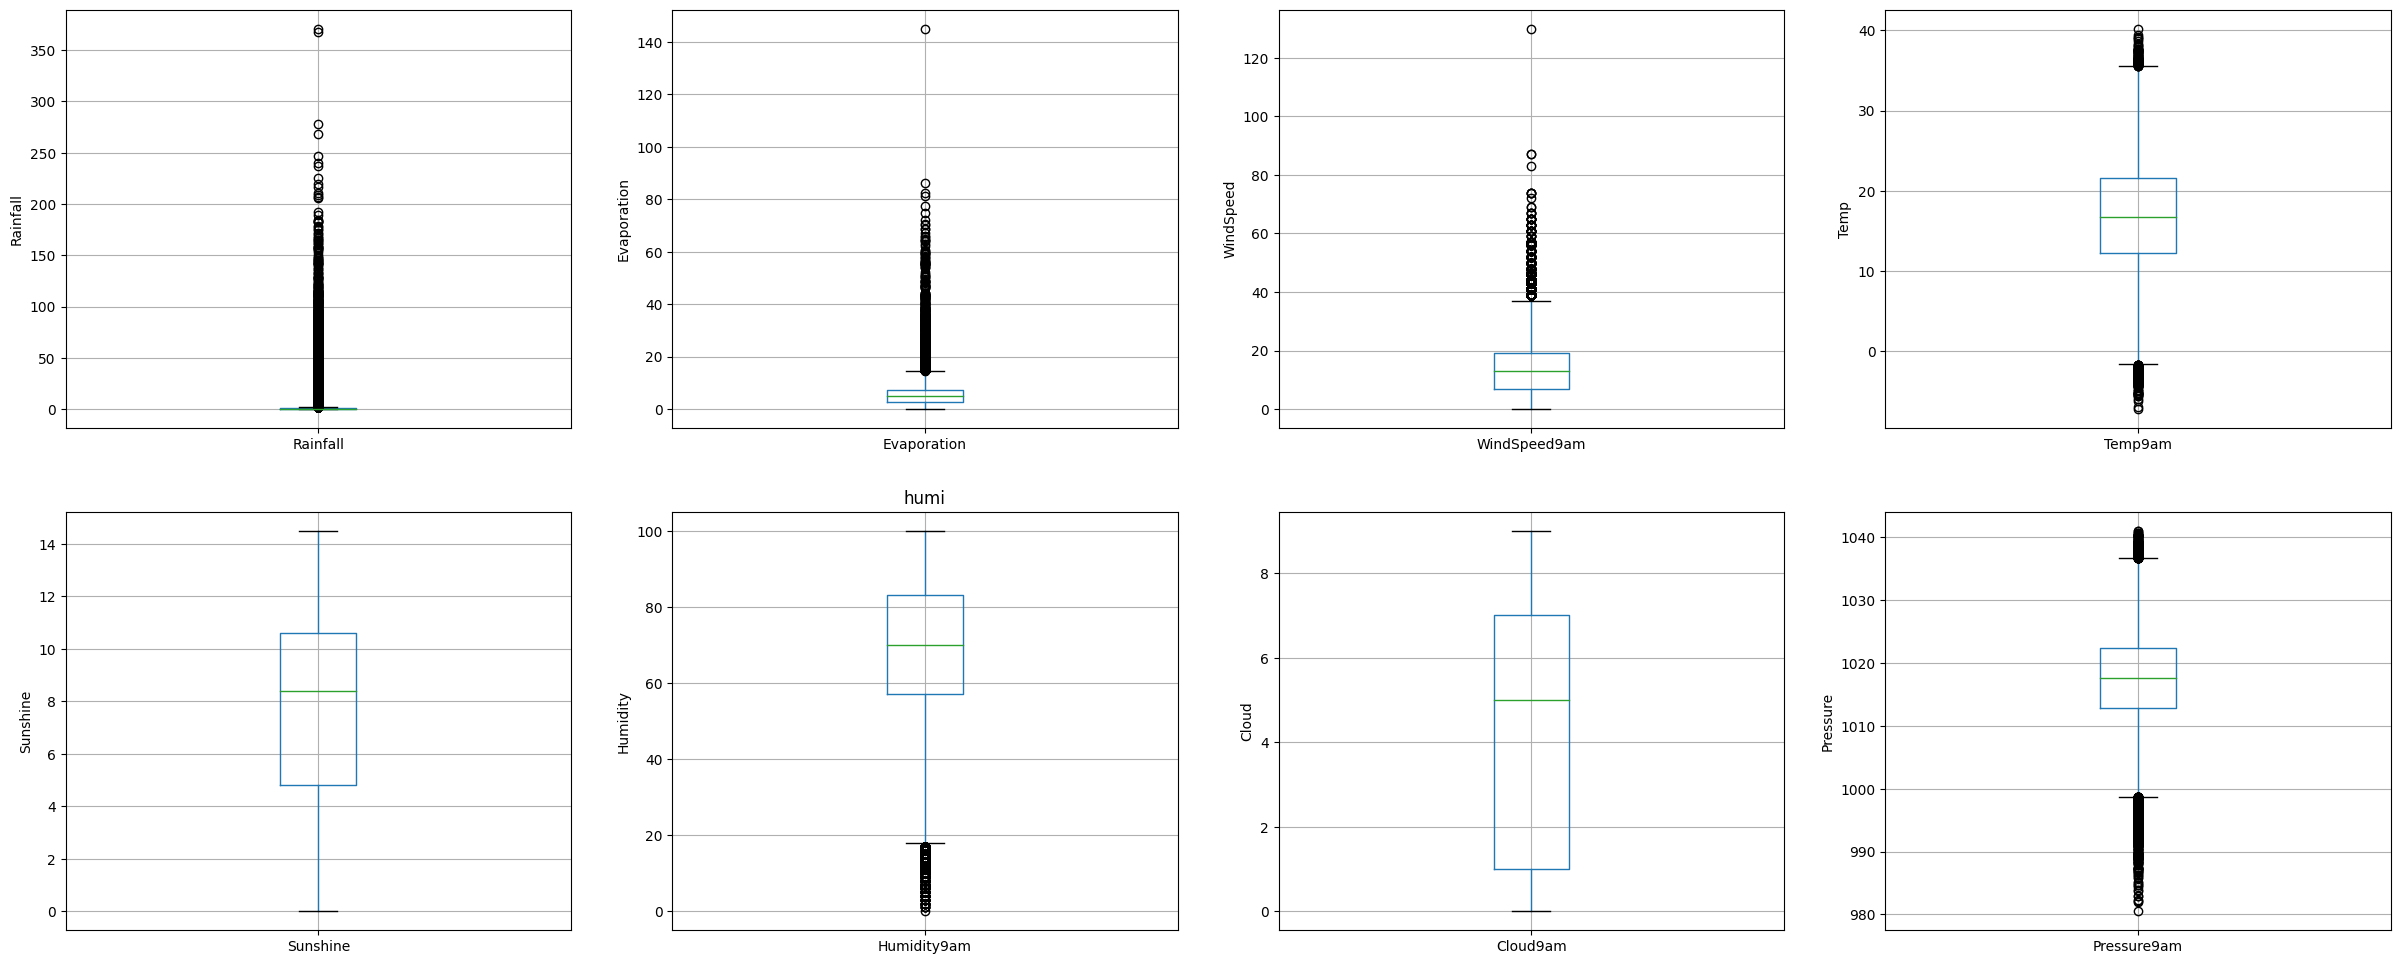

In [7]:
# draw boxplots to visualize outliers

plt.figure(figsize=(30,25))


plt.subplot(4, 4, 1)
fig = data.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(4, 4, 2)
fig = data.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(4, 4, 3)
fig = data.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed')


plt.subplot(4, 4, 4)
fig = data.boxplot(column='Temp9am')
fig.set_title('')
fig.set_ylabel('Temp')


plt.subplot(4, 4, 5)
fig = data.boxplot(column='Sunshine')
fig.set_title('')
fig.set_ylabel('Sunshine')


plt.subplot(4, 4, 6)
fig = data.boxplot(column='Humidity9am')
fig.set_ylabel('Humidity')


plt.subplot(4, 4, 7)
fig = data.boxplot(column='Cloud9am')
fig.set_ylabel('Cloud')


plt.subplot(4, 4, 8)
fig = data.boxplot(column='Pressure9am')
fig.set_ylabel('Pressure')

Text(0, 0.5, 'RainTomorrow')

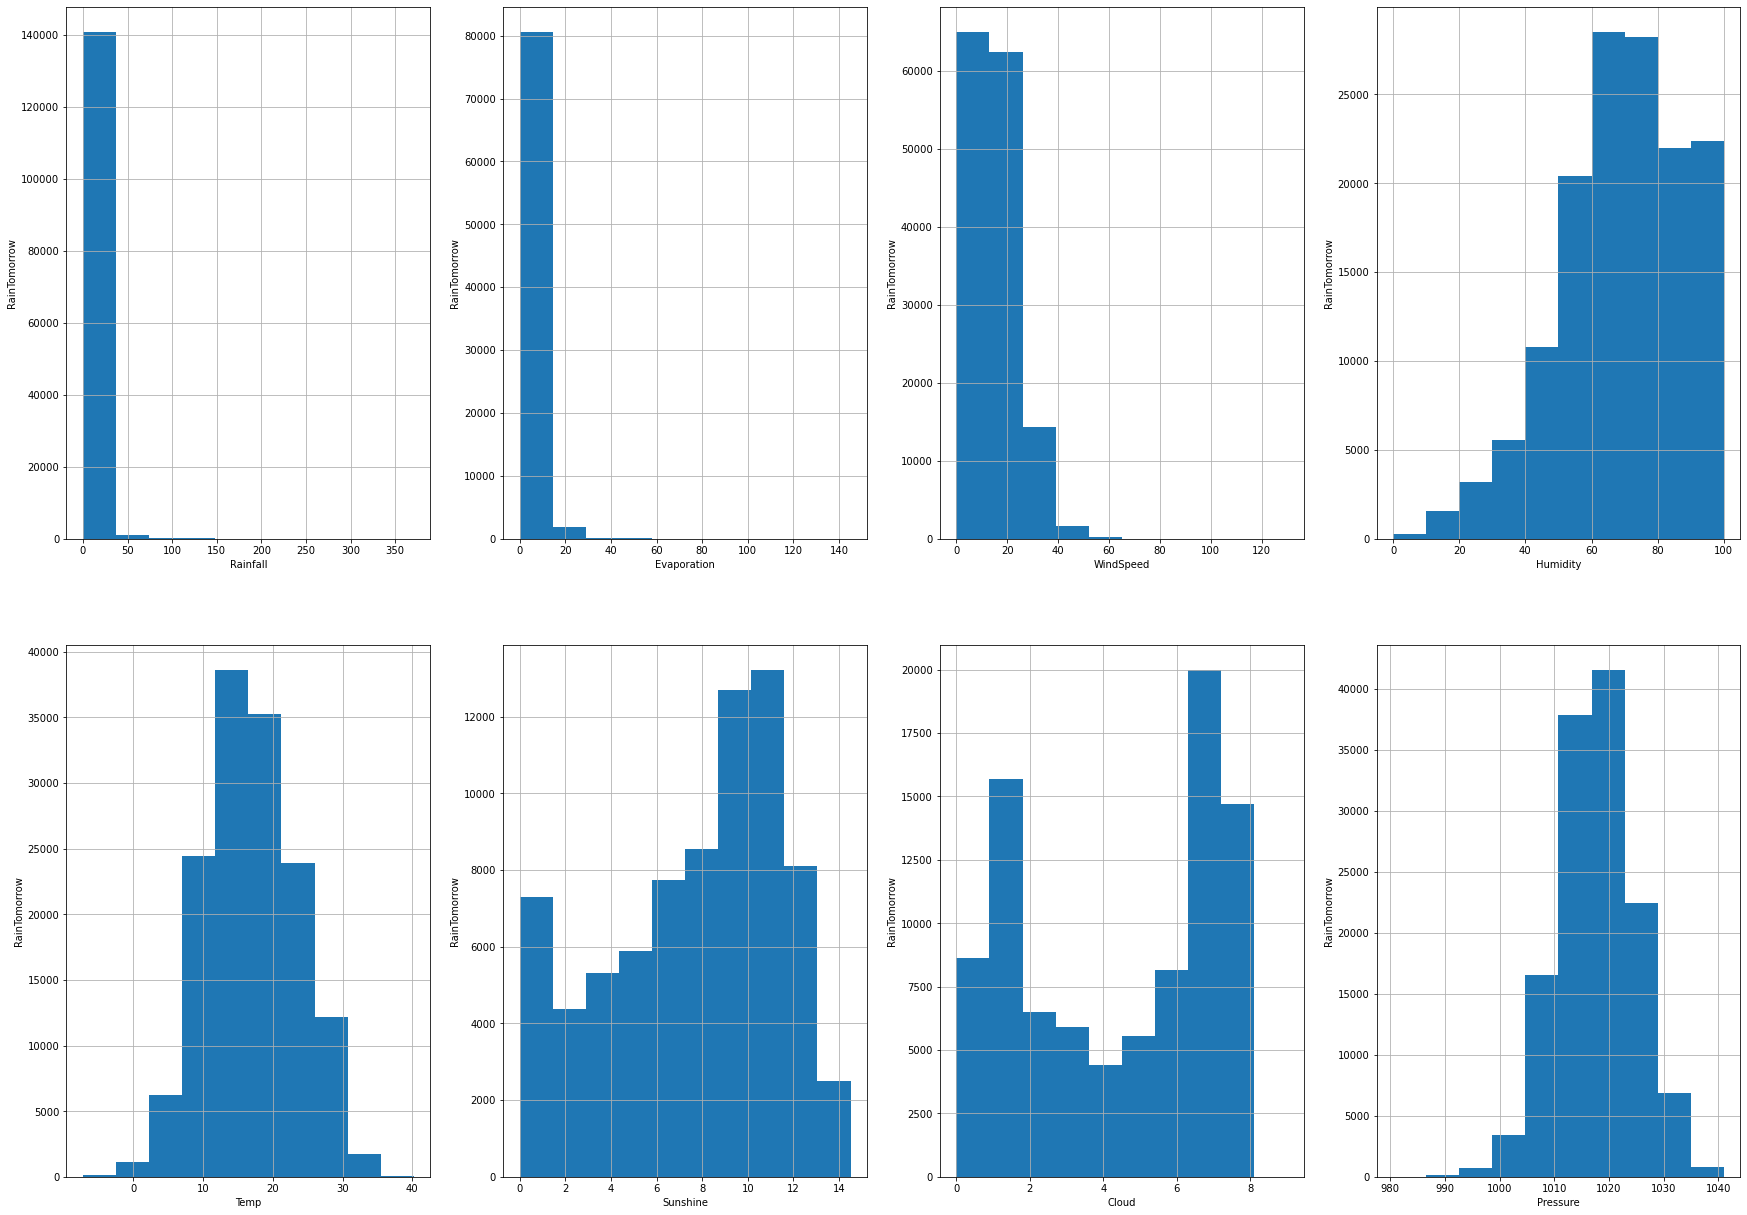

In [36]:
# plot histogram to check distribution

plt.figure(figsize=(30,45))


plt.subplot(4, 4, 1)
fig = data.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(4, 4, 2)
fig = data.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(4, 4, 3)
fig = data.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed')
fig.set_ylabel('RainTomorrow')


plt.subplot(4, 4, 4)
fig = data.Humidity9am.hist(bins=10)
fig.set_xlabel('Humidity')
fig.set_ylabel('RainTomorrow')


plt.subplot(4, 4, 5)
fig = data.Temp9am.hist(bins=10)
fig.set_xlabel('Temp')
fig.set_ylabel('RainTomorrow')


plt.subplot(4, 4, 6)
fig = data.Sunshine.hist(bins=10)
fig.set_xlabel('Sunshine')
fig.set_ylabel('RainTomorrow')


plt.subplot(4, 4, 7)
fig = data.Cloud9am.hist(bins=10)
fig.set_xlabel('Cloud')
fig.set_ylabel('RainTomorrow')


plt.subplot(4, 4, 8)
fig = data.Pressure9am.hist(bins=10)
fig.set_xlabel('Pressure')
fig.set_ylabel('RainTomorrow')


## Multivariate Analysis 

In [41]:
correlation = data.corr()

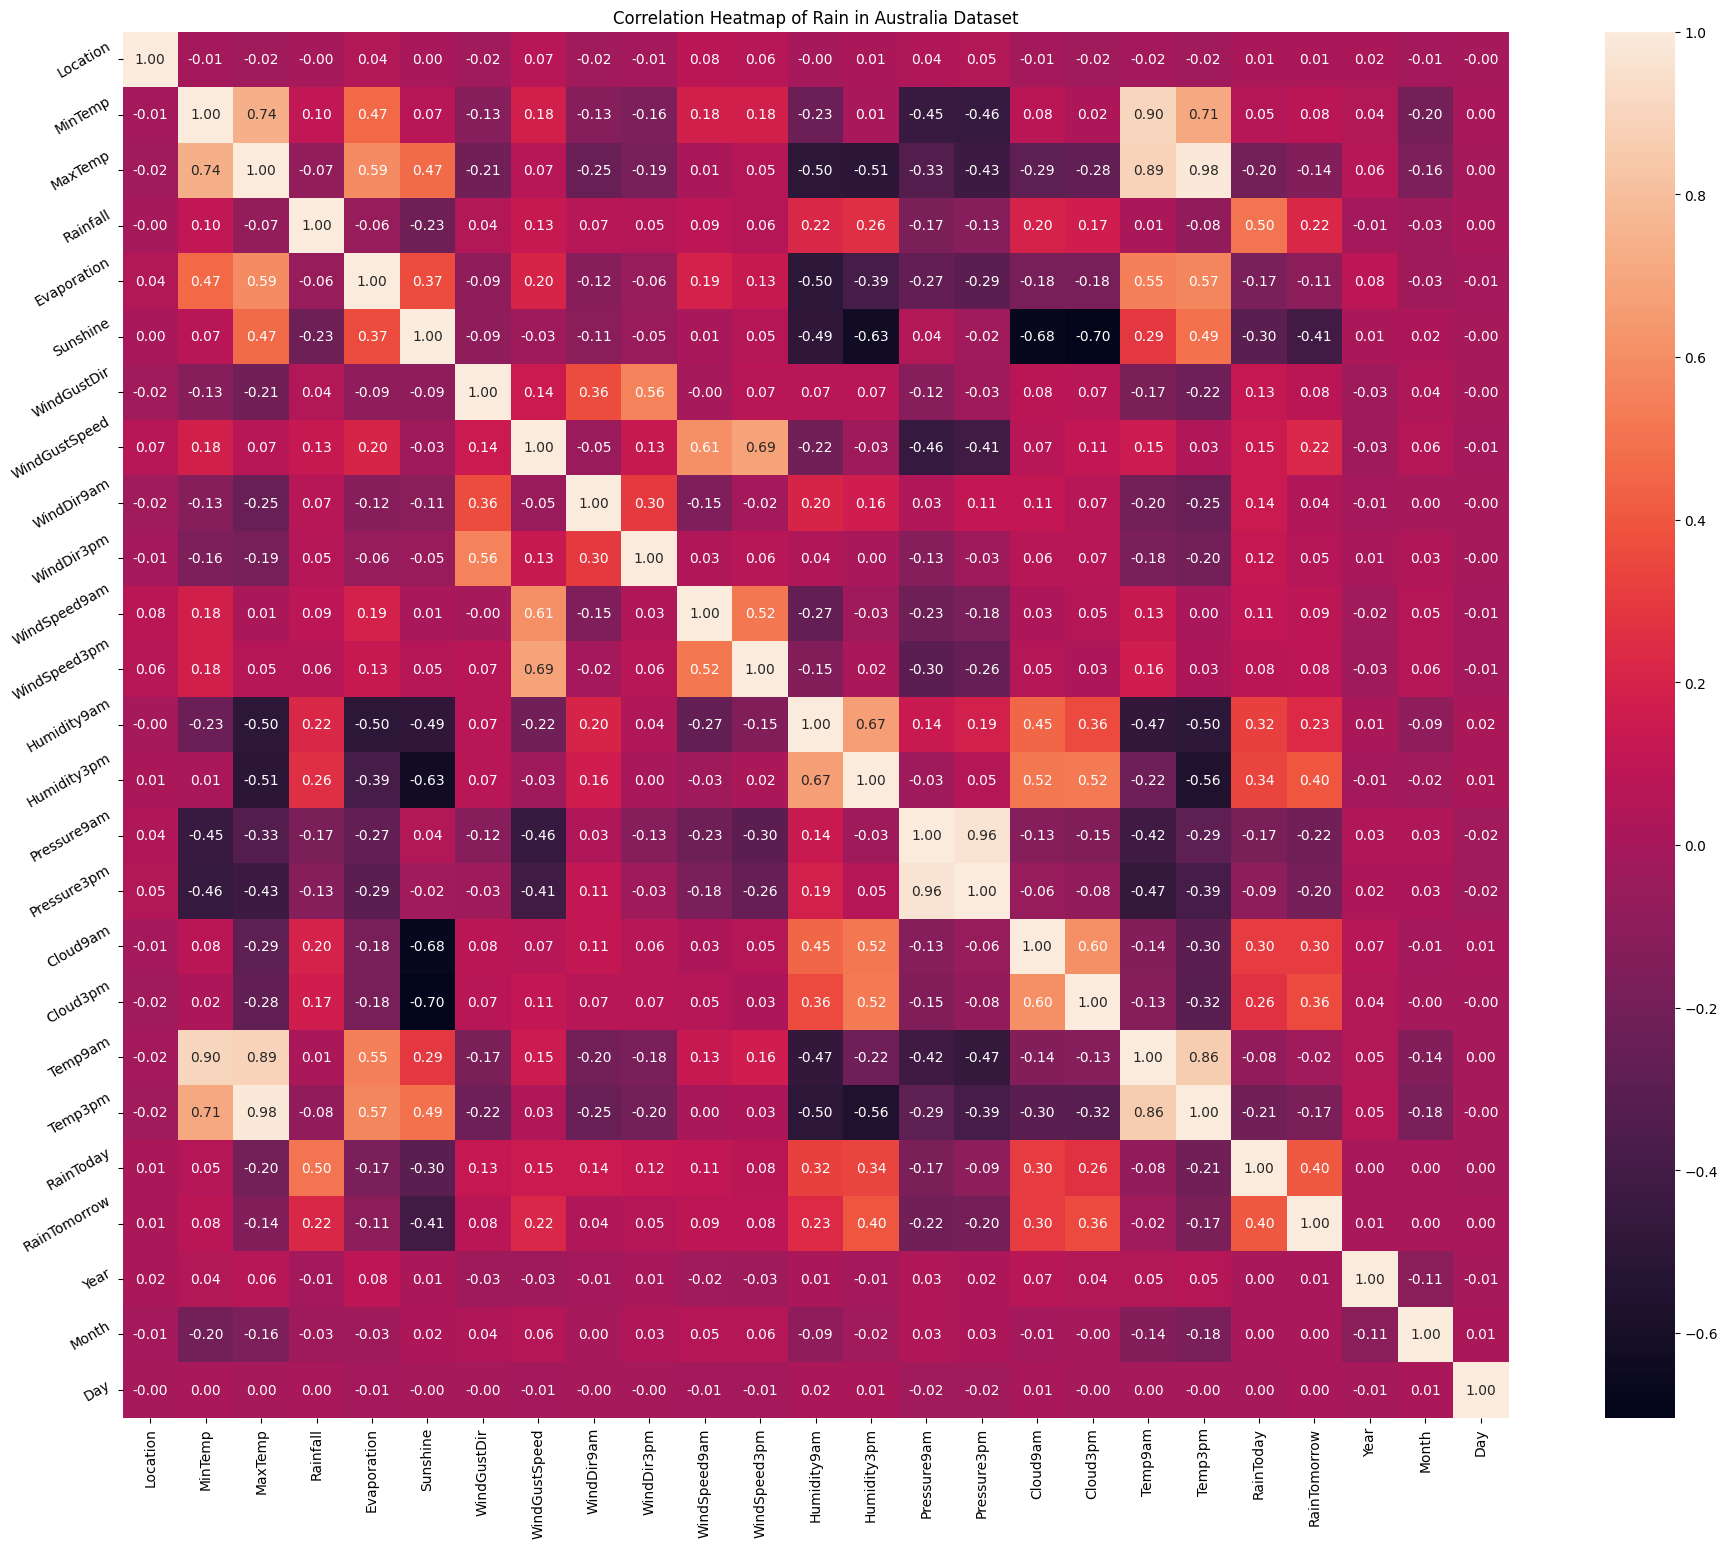

In [68]:
plt.figure(figsize=(25,18))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

- scatter plot 

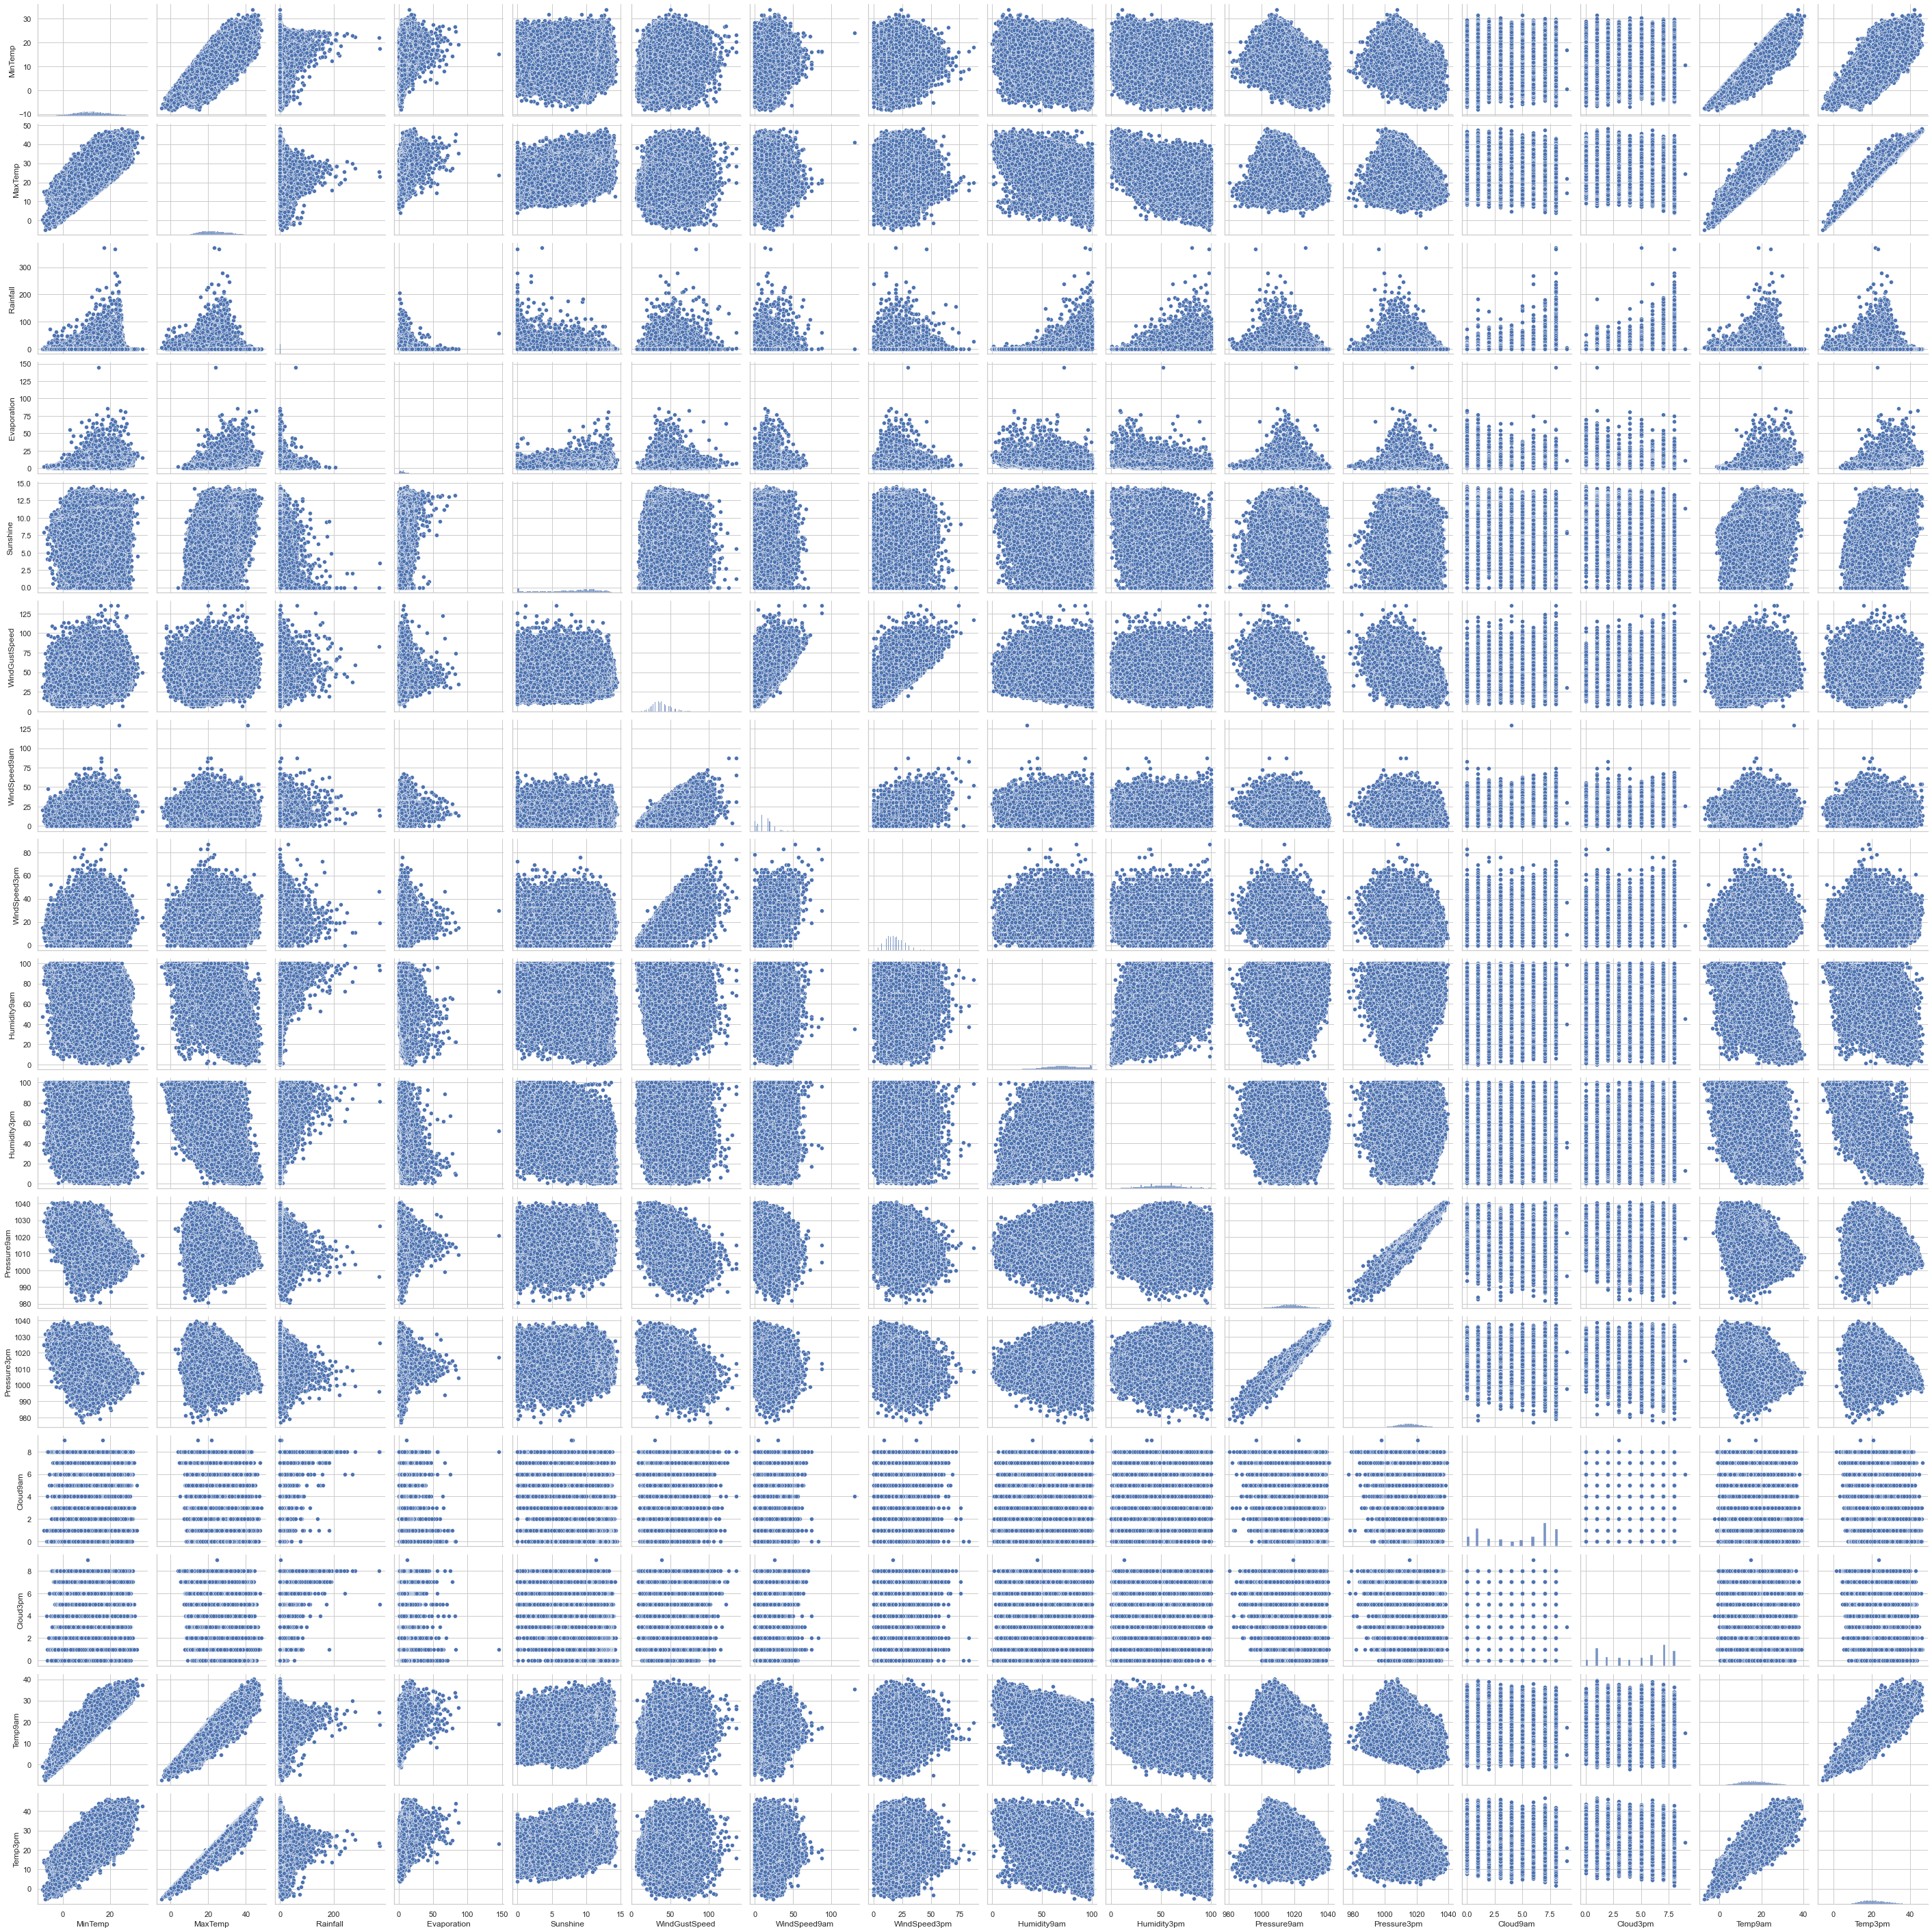

In [54]:
sns.pairplot(data[num_columns], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

In [ ]:
sns.pairplot(data.iloc[:10])

- On peut aussi visualisé la distrubition de 

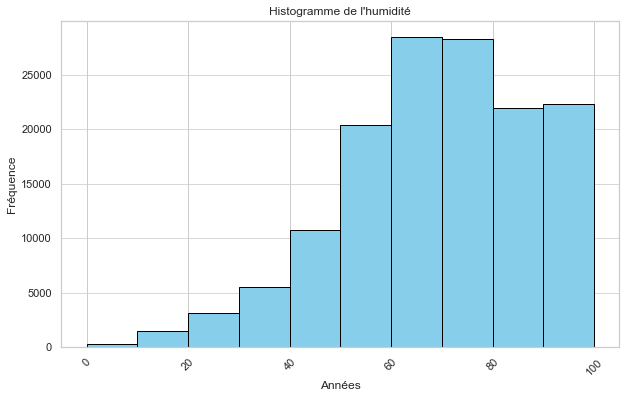

In [128]:
plt.figure(figsize=(10, 6))
plt.hist(data['Humidity9am'], bins=data['Year'].unique().sort(), color='skyblue', edgecolor='black')
plt.xlabel('Années')
plt.ylabel('Fréquence')
plt.title('Histogramme de l\'humidité')
plt.grid(axis='y', alpha=0.75)
plt.xticks(ticks=data['Year'].unique().sort(), rotation=45)  
plt.show()


On peut visualiser la variation de chaque colonne (dans ce cas  `L'humidite` ) a des dates particulieres (`annees`, `mois` ou `dates`)

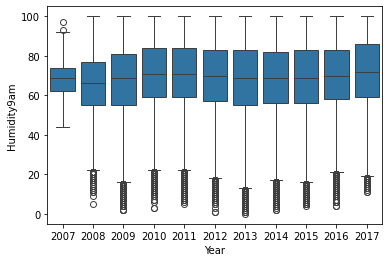

In [42]:
sns.boxplot(data=data, x="Year", y="Humidity9am")
plt.show()

- Visualisation par localisation et par date, la distrubition d'une variables

<Axes: >

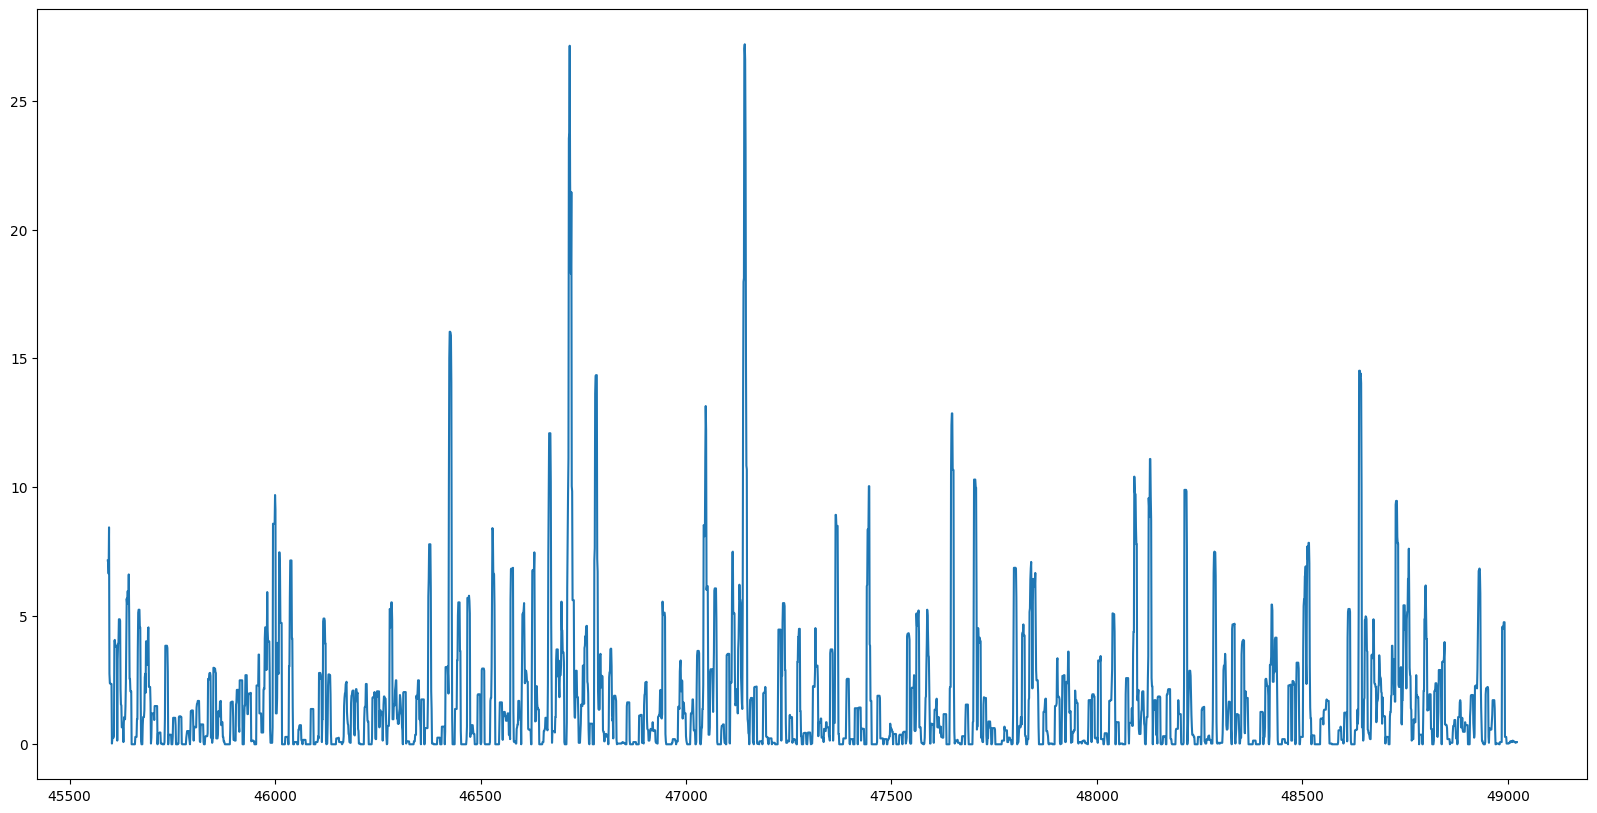

In [67]:
canberra_data = df[df['Location'] == 'Canberra']   # on choisit par exemple le province Canberra
continious_canberra_data = canberra_data.loc['2013-03-01':].copy()
continious_canberra_data['Rainfall'].fillna(method='bfill', inplace=True)
continious_canberra_data['Rainfall'].rolling(window=7).mean().plot(figsize=(20, 10))
